In [10]:
from datasets import load_dataset
import os
dataset = load_dataset("camillexdang/plminterp")

In [5]:
# load dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['Entry_x', 'Sequence', 'length', 'mol_weight', 'iso_point', 'aromaticity', 'instability_index', 'gravy', 'helix_frac', 'turn_frac', 'sheet_frac', 'count_A', 'percent_A', 'count_C', 'percent_C', 'count_D', 'percent_D', 'count_E', 'percent_E', 'count_F', 'percent_F', 'count_G', 'percent_G', 'count_H', 'percent_H', 'count_I', 'percent_I', 'count_K', 'percent_K', 'count_L', 'percent_L', 'count_M', 'percent_M', 'count_N', 'percent_N', 'count_P', 'percent_P', 'count_Q', 'percent_Q', 'count_R', 'percent_R', 'count_S', 'percent_S', 'count_T', 'percent_T', 'count_V', 'percent_V', 'count_W', 'percent_W', 'count_Y', 'percent_Y', 'charge_pH7', 'boman_index', 'aliphatic_index', 'hydrophobic_moment', 'Entry_y', 'Entry Name', 'Protein names', 'Organism', 'Length', 'Mass', 'Subcellular location [CC]', 'Gene Ontology (biological process)', 'Gene Ontology (molecular function)', 'EC number', 'Disruption phenotype', 'Catalytic activity', 'Pathway', 'Su

In [11]:
import matplotlib.pyplot as plt
from datasets import Dataset
import pandas as pd

def plot_histograms(dataset, columns=None, bins=100, output_dir="./visualizations"):
    """
    Plots one histogram per column from a Hugging Face dataset.

    Args:
        dataset: Hugging Face Dataset (e.g., dataset['train']).
        columns: List of columns to plot. Defaults to physicochemical properties.
        bins: Number of bins in each histogram.
    """
    if columns is None:
        columns = [
            "length", "mol_weight", "aromaticity",
            "instability_index", "gravy", "iso_point", "charge_pH7"
        ]

    # Convert to pandas DataFrame
    df = dataset.select_columns(columns).to_pandas()

    for column in columns:
        plt.figure(figsize=(8, 5))
        df[column].hist(bins=bins, color="steelblue", edgecolor="black")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()

         # Save figure
        filepath = os.path.join(output_dir, f"{column}_histogram.png")
        plt.savefig(filepath)
        
        plt.show()


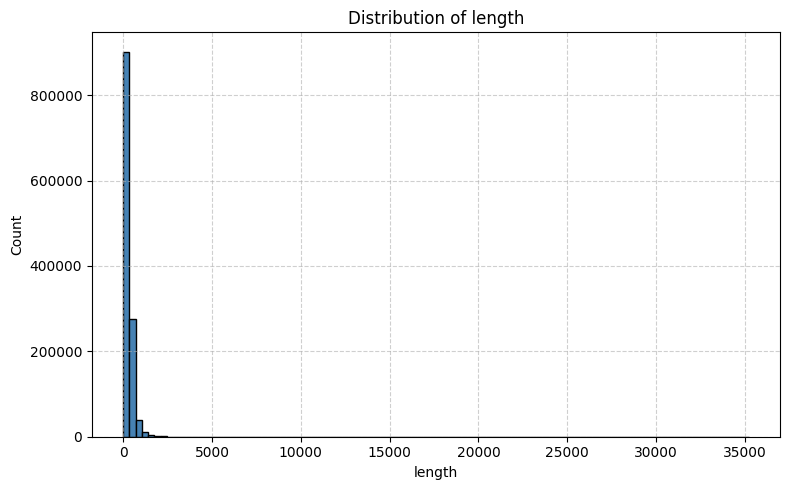

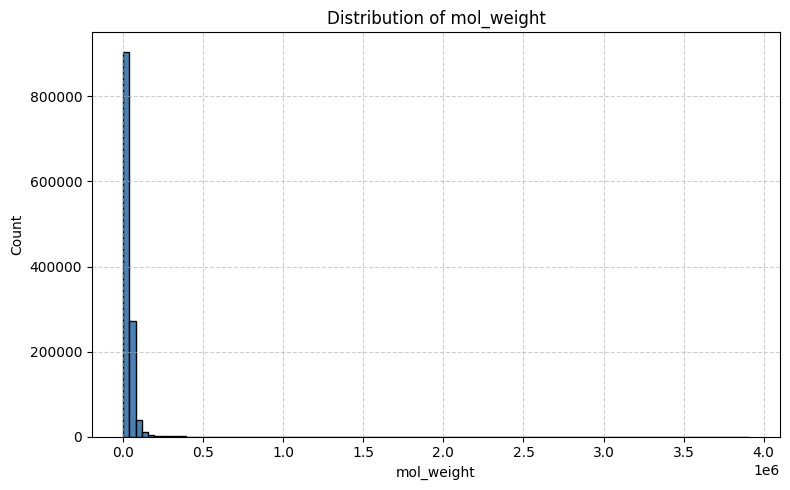

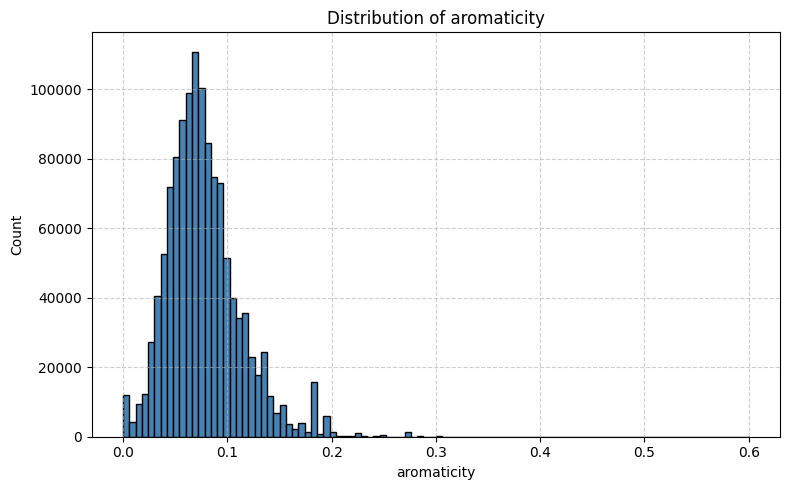

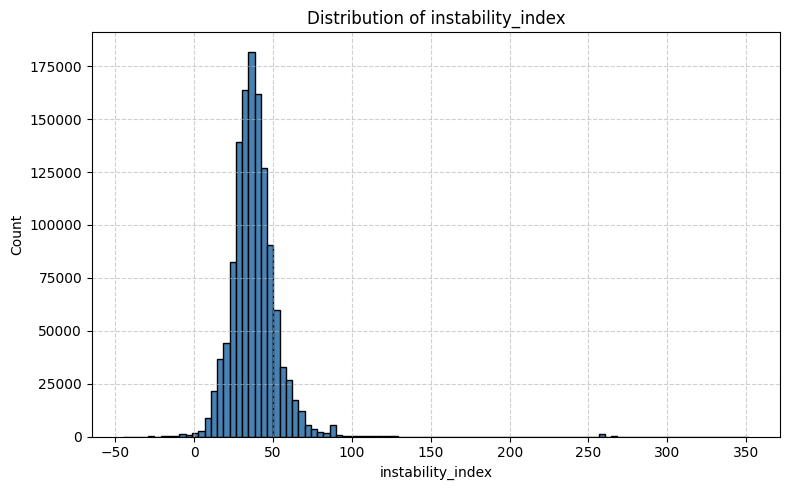

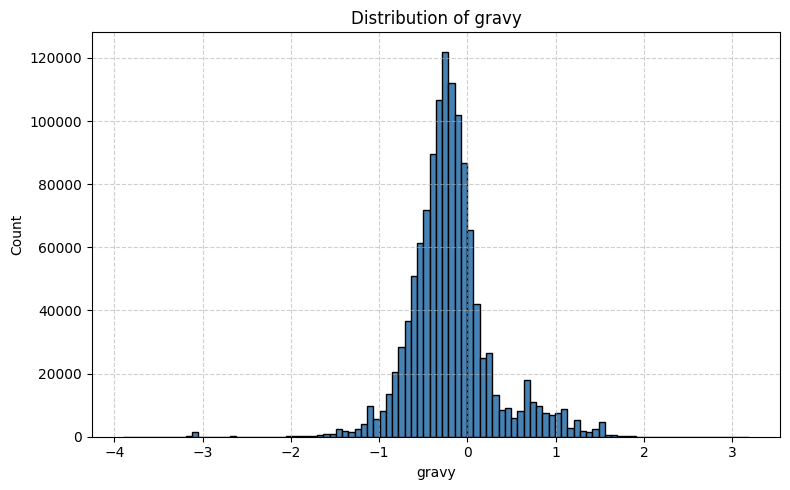

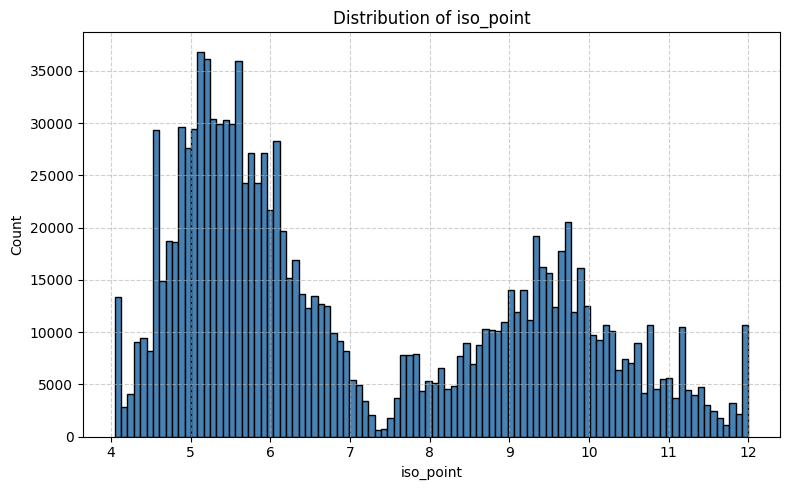

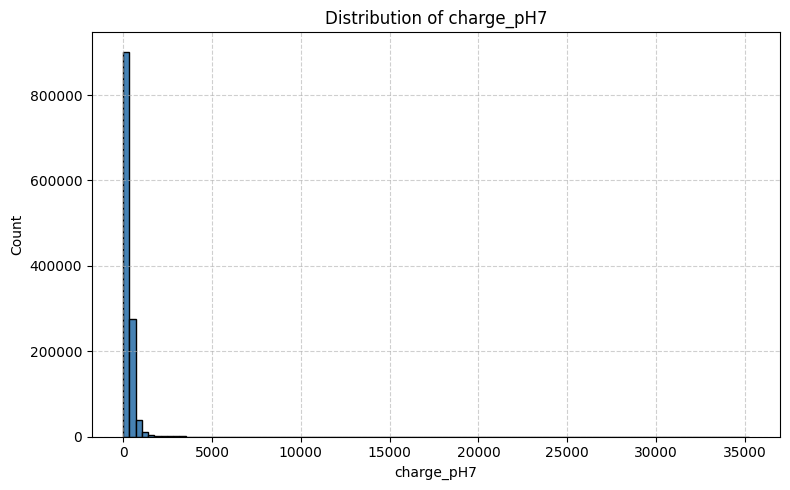

In [12]:
plot_histograms(dataset['train'], bins=100)

In [13]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset
import pandas as pd

def plot_combined_histograms(dataset, output_dir="./visualizations", columns=None, bins=100):
    """
    Plots and saves a single image with multiple seaborn-styled histograms.

    Args:
        dataset: Hugging Face Dataset (e.g., dataset['train']).
        output_dir: Directory to save the final combined image.
        columns: List of columns to include. Defaults to key physicochemical properties.
        bins: Number of bins per histogram.
    """
    if columns is None:
        columns = [
            "length", "mol_weight", "aromaticity",
            "instability_index", "gravy", "iso_point", "charge_pH7"
        ]

    os.makedirs(output_dir, exist_ok=True)

    # Load data
    df = dataset.select_columns(columns).to_pandas()

    # Setup seaborn theme
    sns.set(style="whitegrid", font_scale=1.1)

    # Create subplots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.histplot(df[column], bins=bins, kde=True, ax=axes[i], color="steelblue")
        axes[i].set_title(column)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    # Remove the empty subplot if 7 plots in an 8-grid
    if len(columns) < len(axes):
        fig.delaxes(axes[-1])

    plt.suptitle("Distributions of Physicochemical Properties", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save the combined figure
    filepath = os.path.join(output_dir, "physicochemical_histograms.png")
    plt.savefig(filepath, dpi=300)
    plt.close()
plot_combined_histograms(dataset['train'], bins=100)

In [16]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_combined_histograms(dataset, output_dir="./visualizations", columns=None, bins=100):
    """
    Plots and saves a single image with multiple seaborn-styled histograms.

    Args:
        dataset: Hugging Face Dataset (e.g., dataset['train']).
        output_dir: Directory to save the final combined image.
        columns: List of columns to include. Defaults to key physicochemical properties.
        bins: Number of bins per histogram.
    """
    if columns is None:
        columns = [
            "length", "mol_weight", "aromaticity",
            "instability_index", "gravy", "iso_point", "charge_pH7"
        ]

    os.makedirs(output_dir, exist_ok=True)

    # Load data
    df = dataset.select_columns(columns).to_pandas()

    # Setup seaborn theme
    sns.set(style="whitegrid", font_scale=1.1)

    # Create subplots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        ax = axes[i]

        # Clip outliers using quantiles
        if column in ["length", "mol_weight", "charge_pH7"]:
            lower, upper = df[column].quantile([0.001, 0.99])
            clipped = df[column].clip(lower=lower, upper=upper)
        else:
            clipped = df[column]

        sns.histplot(clipped, bins=bins, kde=True, ax=ax, color="steelblue")
        ax.set_title(column)
        ax.set_xlabel("")
        ax.set_ylabel("")

    # for i, column in enumerate(columns):
    #     ax = axes[i]
    #     sns.histplot(df[column], bins=bins, kde=True, ax=ax, color="steelblue")
    #     ax.set_title(column)
    #     ax.set_xlabel("")
    #     ax.set_ylabel("")

        # # Adjust x-axis for better visibility
        # if column in ["length", "mol_weight", "charge_pH7"]:
        #     lower, upper = df[column].quantile([0.001, 0.99])
        #     ax.set_xlim([lower, upper])

    # Remove extra subplot if needed
    if len(columns) < len(axes):
        fig.delaxes(axes[-1])

    plt.suptitle("Distributions of Physicochemical Properties", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    filepath = os.path.join(output_dir, "physicochemical_histograms.png")
    plt.savefig(filepath, dpi=300)
    plt.close()
plot_combined_histograms(dataset['train'], bins=100)